In [ ]:
import numpy as np
import pandas as pd

import os

from matplotlib import pyplot as plt
from matplotlib.pyplot import specgram

import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio

from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Aprendizaje de maquinas/Proyecto

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Aprendizaje de maquinas/Proyecto


In [ ]:
paths=[]
labels=[]

for dirname, _, filenames in os.walk('DataSets/Emotions/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename[::-1].split('.')[0][::-1]
        name = dirname[::].split('/')[2]
        name_complete = name+'.'+label
        labels.append(name_complete.lower())

In [ ]:
data = pd.DataFrame({'speech':paths,'label':labels})
data.sample(10)

,speech,label
3294,DataSets/Emotions/Sad/OAF_kite_sad.wav,sad.wav
5178,DataSets/Emotions/Fearful/1071_IEO_FEA_MD.wav,fearful.wav
6336,DataSets/Emotions/Fearful/1008_TSI_FEA_XX.wav,fearful.wav
6005,DataSets/Emotions/Fearful/03-01-06-02-01-02-17...,fearful.wav
8280,DataSets/Emotions/Happy/1011_IWL_HAP_XX.wav,happy.wav
7726,DataSets/Emotions/Happy/YAF_cheek_happy.wav,happy.wav
5014,DataSets/Emotions/Fearful/1044_IEO_FEA_HI.wav,fearful.wav
9973,DataSets/Emotions/Neutral/YAF_tire_neutral.wav,neutral.wav
643,DataSets/Emotions/Angry/1063_IEO_ANG_MD.wav,angry.wav
2931,DataSets/Emotions/Sad/1060_TSI_SAD_XX.wav,sad.wav


In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['label'] = data['label'].apply(lambda x: str(x).split('.wav')[0])
data['label']= label_encoder.fit_transform(data['label'])

In [ ]:
data.head()

,speech,label
0,DataSets/Emotions/Suprised/03-01-08-01-01-01-0...,6
1,DataSets/Emotions/Suprised/03-01-08-01-01-01-0...,6
2,DataSets/Emotions/Suprised/03-01-08-01-01-01-0...,6
3,DataSets/Emotions/Suprised/03-01-08-01-01-01-0...,6
4,DataSets/Emotions/Suprised/03-01-08-01-01-01-0...,6


In [ ]:
data['label'].unique().tolist()

[6, 0, 5, 2, 3, 4, 1]

In [ ]:
def MFCC(filename):
    y, sr = librosa.load(filename,duration=3,offset=0.5)
    return np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)

mfcc= data['speech'].apply(lambda x:MFCC(x))

In [ ]:
mfcc

0        [-634.0881, 63.586414, -2.3689847, 11.394062, ...
1        [-541.788, 46.464664, -19.85648, 13.513388, -1...
2        [-601.68665, 79.489105, 5.1288147, 16.806583, ...
3        [-586.5444, 44.5932, -17.341076, 3.3907297, -1...
4        [-594.63055, 70.331024, 1.8334208, 14.906159, ...
                               ...                        
12811    [-270.6576, 95.62151, -6.834071, 49.797806, -1...
12812    [-428.9021, 147.06631, 6.2788296, 48.605995, -...
12813    [-405.92975, 150.54169, 8.544023, 64.26955, -3...
12814    [-404.6419, 140.73233, 20.523947, 43.12029, -1...
12815    [-419.41592, 132.75809, 14.367569, 59.56287, -...
Name: speech, Length: 12816, dtype: object

In [ ]:
print(f'Cantidad de Registros de Audio: {mfcc.shape}')

Cantidad de Registros de Audio: (12816,)


In [ ]:
import numpy as np
X = np.asarray(mfcc.to_list())
y = np.asarray(data['label'])

In [ ]:
X

array([[-6.3408807e+02,  6.3586414e+01, -2.3689847e+00, ...,
         3.6079395e-01, -2.4947174e+00, -1.7608403e+00],
       [-5.4178802e+02,  4.6464664e+01, -1.9856480e+01, ...,
         2.9893882e+00,  9.8256916e-01,  2.1074791e+00],
       [-6.0168665e+02,  7.9489105e+01,  5.1288147e+00, ...,
         5.5722779e-01, -1.2010038e-03,  3.3462424e+00],
       ...,
       [-4.0592975e+02,  1.5054169e+02,  8.5440226e+00, ...,
        -5.6123632e-01, -5.3259504e-01,  3.0777652e+00],
       [-4.0464191e+02,  1.4073233e+02,  2.0523947e+01, ...,
         3.2259792e-01, -1.7822572e+00,  1.9289889e+00],
       [-4.1941592e+02,  1.3275809e+02,  1.4367569e+01, ...,
         3.8110783e+00,  3.0832102e+00,  5.4786520e+00]], dtype=float32)

In [ ]:
y

array([6, 6, 6, ..., 1, 1, 1])

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(f'Dimensiones mfcc:{X.shape}')
print(f'Dimensiones label:{y.shape}')

Dimensiones mfcc:(12816, 40)
Dimensiones label:(12816,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
svc_model=SVC(gamma='auto')

In [ ]:
parameters = {
    'C': [i/10 for i in range(1,11)],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto',1/10,1/20]
}

In [ ]:
grid = GridSearchCV(estimator=svc_model,
                    param_grid=parameters,
                    scoring=['balanced_accuracy','f1_weighted'],
                    refit= 'balanced_accuracy',
                    verbose=4,
                    cv=3)

In [ ]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV 1/3] END C=0.1, gamma=scale, kernel=linear; balanced_accuracy: (test=0.510) f1_weighted: (test=0.492) total time=   3.0s
[CV 2/3] END C=0.1, gamma=scale, kernel=linear; balanced_accuracy: (test=0.519) f1_weighted: (test=0.498) total time=   2.9s
[CV 3/3] END C=0.1, gamma=scale, kernel=linear; balanced_accuracy: (test=0.515) f1_weighted: (test=0.497) total time=   2.9s
[CV 1/3] END C=0.1, gamma=scale, kernel=poly; balanced_accuracy: (test=0.507) f1_weighted: (test=0.509) total time=   3.5s
[CV 2/3] END C=0.1, gamma=scale, kernel=poly; balanced_accuracy: (test=0.495) f1_weighted: (test=0.492) total time=   3.5s
[CV 3/3] END C=0.1, gamma=scale, kernel=poly; balanced_accuracy: (test=0.493) f1_weighted: (test=0.497) total time=   3.4s
[CV 1/3] END C=0.1, gamma=scale, kernel=rbf; balanced_accuracy: (test=0.556) f1_weighted: (test=0.542) total time=   5.6s
[CV 2/3] END C=0.1, gamma=scale, kernel=rbf; balanced_accuracy: (test=0

GridSearchCV(cv=3, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                               1.0],
                         'gamma': ['scale', 'auto', 0.1, 0.05],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='balanced_accuracy',
             scoring=['balanced_accuracy', 'f1_weighted'], verbose=4)

In [ ]:
print(f'Los parametros del mejor modelo: {grid.best_params_}')

Los parametros del mejor modelo: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
y_pred_test = grid.predict(X_test)

0.6661466458658346
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       216
           1       0.59      0.53      0.56       190
           2       0.65      0.57      0.61       192
           3       0.73      0.62      0.67       224
           4       0.58      0.66      0.62       171
           5       0.61      0.73      0.67       223
           6       0.90      0.92      0.91        66

    accuracy                           0.67      1282
   macro avg       0.69      0.69      0.69      1282
weighted avg       0.67      0.67      0.66      1282



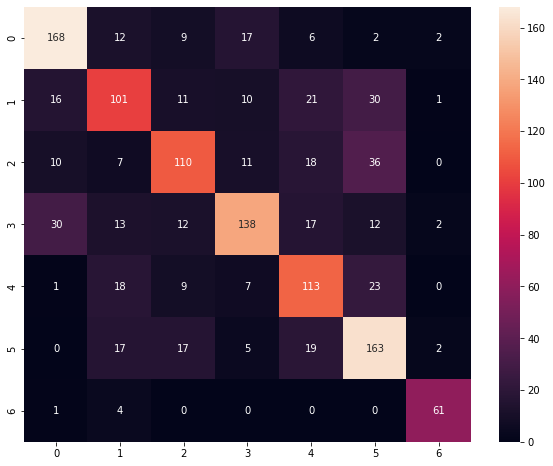

In [ ]:
print(accuracy_score(y_true=y_test,y_pred=y_pred_test))
print(classification_report(y_test,y_pred_test)) 
matrizr = confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(10,8))
sns.heatmap(matrizr, annot=True, fmt="d");